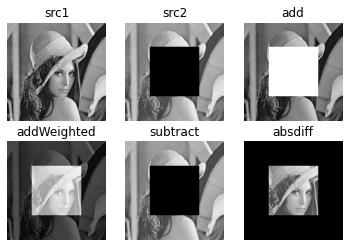

In [22]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2 ,dst=src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

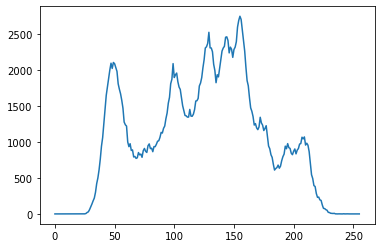

-1

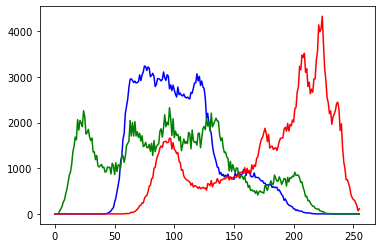

In [38]:
import cv2
import matplotlib.pyplot as plt


src = cv2.imread('lenna.bmp',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([src], [0], None, [256], [0,256])

cv2.imshow('src',src)
cv2.waitKey(1)

plt.plot(hist)
plt.show()

src = cv2.imread('lenna.bmp')
colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p,c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p],[0],None,[256],[0,256])
    plt.plot(hist, color=c)

cv2.imshow('src', src)
cv2.waitKey(1)

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('field.bmp')
src_ycrcb=cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
planes = cv2.split(src_ycrcb)
planes[0] = cv2.equalizeHist(planes[0])
dst_y = cv2.merge(planes)
dst = cv2.cvtColor(dst_y, cv2.COLOR_YCR_CB2BGR)


cv2.imshow('dst',dst)
cv2.waitKey()

cv2.destroyWindow('dst')

import cv2

In [3]:
import cv2
import numpy as np
import sys

cap1 = cv2.VideoCapture(0)

if not cap1.isOpened():
    print("video open failed!")
    sys.exit()

cap2 = cv2.VideoCapture('raining.mp4')

if not cap2.isOpened():
    print("video open failed!")
    sys.exit()

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
print('w x h : {} x {}'.format(w, h))
print('frame_cnt1: ', frame_cnt1)
print('frame_cnt2: ', frame_cnt2)

fps =cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000/fps)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi', fourcc,fps, (w,h))

do_composit = False

while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break
        frame2 = cv2.resize(frame2, (w,h))

        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50,00,0),(80,255,255))
        cv2.copyTo(frame2, mask, frame1)

    out.write(frame1 )

    cv2.imshow('frame',frame1)
    key =cv2.waitKey(delay)

    if key ==ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break


cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()


w x h : 640 x 480
frame_cnt1:  -1
frame_cnt2:  -1
